# Development of Emotion and Reasoning in the General Speeches of the United Nations: A text-based machine learning approach
## Script 2: Figures & Tables
### Author: Sarah Franzen

Run Script 0 and 1 beforehand in order to create the proper folder structure and implement the data.

### Description: 
#### This file creates the following figures and tables

Summary Statistics
- ?????????

Descriptive Figures
- Frequency of speeches by year
- Frequency of speeches by country
- Longest and Shortest Speeches by Word Count
- Percentage of Speeches by official language
- Share of female speakers
- Share of position by speakers

Result Figures
- Emotionaliy Scoring overall
- Emotionality Scoring by permanent Security Council Membership
- Emotionality Scoring by permanent Security Council Members
- Emotionality Scoring by Gender
- Emotionality Scoring by English as official language
- Emotionality Scoring by Position

### Set Up & Load Data

In [100]:
# == Import libraries for data processing and visualization ==
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
import seaborn as sns
import os
import joblib
import pandas as pd
from tabulate import tabulate

# === Set Working Directory ===

# Prompt user to enter working directory path
#wd = input("Please enter your working directory path (e.g., C:\\Users\\sarah\\OneDrive\\Dokumente\\Masterarbeit): ").strip()

# Change to the entered working directory
#try:
   # os.chdir(wd)
    #print(f"Working directory set to: {os.getcwd()}")
#except FileNotFoundError:
   # print("ERROR: The directory you entered does not exist. Please restart and enter a valid path.")
    #exit(1)

# Set your working directory (adjust this as needed)
wd = r"C:\Users\sarah\OneDrive\Dokumente\Masterarbeit"

# === Define Folder Paths ===
wd_results = os.path.join(wd, 'results')
data_c = os.path.join(wd, 'data')
data_temp = os.path.join(data_c, 'temp')
data_freq = os.path.join(data_c, 'freq')
fig_dir = os.path.join(wd, 'fig')

# == Define Global Plotting Settings ===

FIGSIZE = (12, 6)
LINEWIDTH = 1
MARKER = None

# Grid style
GRID_STYLE = "whitegrid"
# Set global grid style
sns.set_style(GRID_STYLE)

# X-axis ticks
TICK_YEARS = list(range(1950, 2021, 10))
XTICK_ROTATION = 45

# Y-axis range for primary axis (y1)
Y_RANGE_EMOTIONALITY = (0.4, 1.4)

# Y-axis for second axis (y2)
SECOND_Y_AXIS_BOTTOM = 0

# Legend settings
LEGEND_LOC = "upper center"
LEGEND_BBOX = (0.5, -0.15)
LEGEND_NCOL = 3

# Layout
TIGHT_LAYOUT_RECT = [0, 0, 1, 1]

# Despine options
DESPINE_SETTINGS = dict(left=True, right=True, top=True, bottom=False)

# Color Palette
CUSTOM_COLORS = ['#004260', '#50822E', '#F69B2D', '#E4003A', '#D95F02']

# === Load data ===

################ FIXXXXX un_corpus_scored also when loading!!!
os.chdir(wd_results)
un_corpus_scored = pd.read_csv(
    os.path.join(wd_results, "un_corpus_scored.csv"),
    sep=';', 
    encoding='utf-8'
)

# Keep only rows where 'score' is not NA
rows_before = len(un_corpus_scored)
un_corpus_scored = un_corpus_scored[un_corpus_scored['score'].notna()]
print(f"Rows dropped due to missing score: {rows_before - len(un_corpus_scored)}")

Rows dropped due to missing score: 0


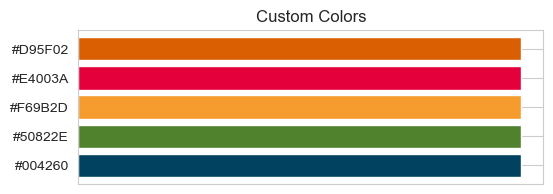

In [101]:
# Plot the individual colors as horizontal bars
plt.figure(figsize=(6, 2))
for i, color in enumerate(CUSTOM_COLORS):
    plt.barh(y=i, width=1, color=color)
plt.yticks(range(len(CUSTOM_COLORS)), CUSTOM_COLORS)
plt.xticks([])
plt.title("Custom Colors")
plt.show()


### Figure: Frequency of speeches by year

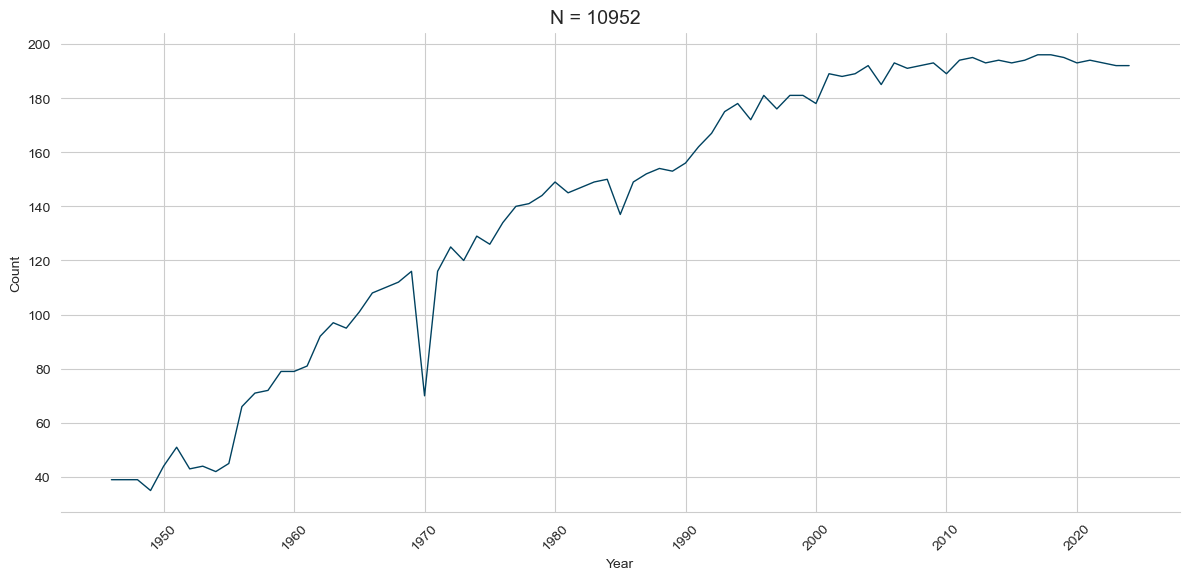

In [103]:
# Count of entries per year
overall_sample_size_per_year = un_corpus_scored['year'].value_counts().sort_index()

# Get total sample size
overall_total = overall_sample_size_per_year.sum()

# PLot
plt.figure(figsize=FIGSIZE) 
sns.lineplot(
    x=overall_sample_size_per_year.index,
    y=overall_sample_size_per_year.values,
    marker=MARKER,             
    color=CUSTOM_COLORS[0], 
    linewidth=LINEWIDTH         
)

plt.xlabel("Year")
plt.ylabel("Count")

plt.xticks(TICK_YEARS, TICK_YEARS, rotation=XTICK_ROTATION)

plt.suptitle(f"N = {overall_total}", fontsize=14, y=0.96) 

sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'frequency_by_year.png'))
plt.show()


### Figure: Frequency of speeches by country

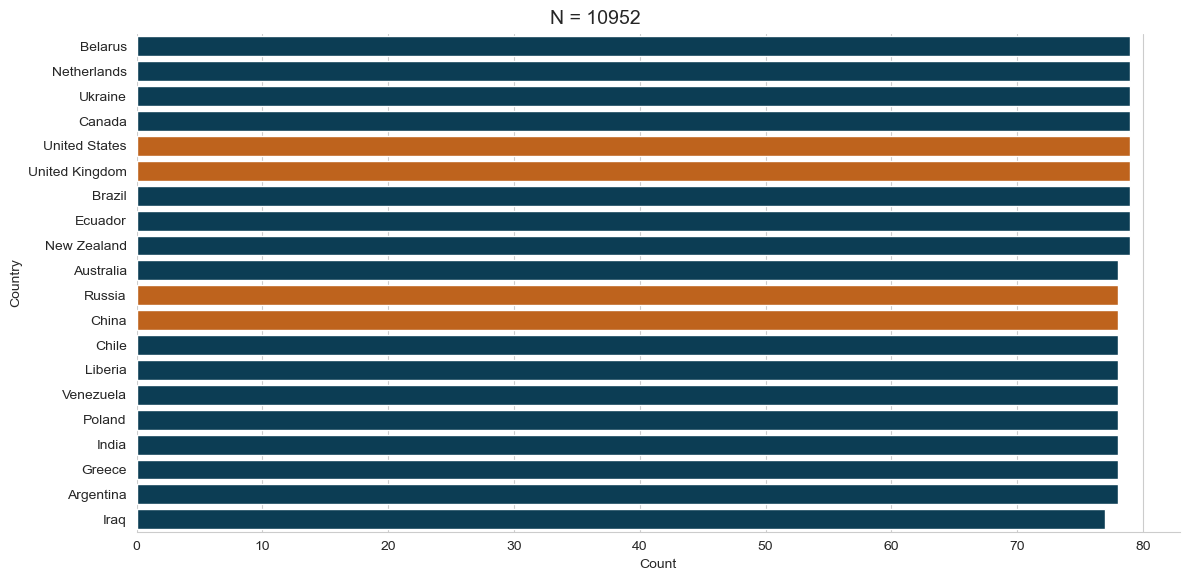

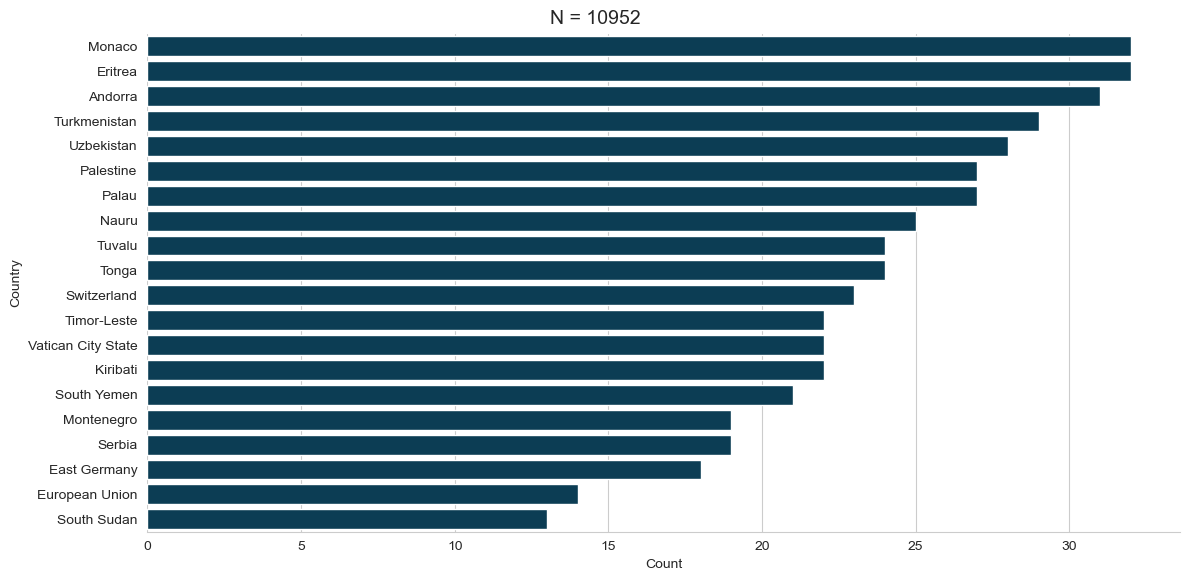

In [79]:
# === Graph 1: Top 20 Countries by Frequency ===

top_countries = un_corpus_scored['country_name'].value_counts().nlargest(20)

# Get security council status for top countries
country_security_status = (
    un_corpus_scored.groupby('country_name')['security_council_permanent']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else 0)
    .reindex(top_countries.index)
)

# Assign colors: orange if permanent member of security council, blue otherwise
colors_barchart_sec_council = ['#D95F02' if status == 1 else '#004260' for status in country_security_status]

plt.figure(figsize=FIGSIZE) 
sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors_barchart_sec_council)
plt.xlabel("Count")
plt.ylabel("Country")
plt.suptitle(f"N = {overall_total}", fontsize=14, y=0.96) 
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

plt.savefig(os.path.join(fig_dir, 'top_20_countries_by_frequency.png'))
plt.show()

# === Graph 2: Bottom 20 Countries by Frequency ===
bottom_countries = un_corpus_scored['country_name'].value_counts().nsmallest(20)
bottom_countries = bottom_countries.sort_values(ascending=False)

plt.figure(figsize=FIGSIZE)
sns.barplot(x=bottom_countries.values, y=bottom_countries.index, color=CUSTOM_COLORS[0])
plt.xlabel("Count")
plt.ylabel("Country")
plt.suptitle(f"N = {overall_total}", fontsize=14, y=0.96) 
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

plt.savefig(os.path.join(fig_dir, 'bottom_20_countries_by_frequency.png'))
plt.show()



### Figure: Length of Speeches over time (BEOFRE PREPROCESSING)

In [84]:
un_corpus_scored.head()

,filename,speech,country_code,year,country_name,speech_length_words,english_official_language,security_council_permanent,speaker_name,position,gender_dummy,speech_label,affect_d,cognition_d,score
0,CHL_32_1977.txt,﻿78.\t I am pleased to congratulate Mr. Lazar...,CHL,1977,Chile,3657,0,0,Carvajal,NaN,NaN,Chile (1977),1.393397,0.695997,0.465185
1,PRT_76_2021.txt,"I congratulate you on your election, Mr. Presi...",PRT,2021,Portugal,887,0,0,Marcelo Rebelo de Sousa,(Vice-) President,NaN,Portugal (2021),1.279130,1.106764,0.807032
2,TZA_35_1980.txt,"﻿Permit me, Sir, on my own personal behalf and...",TZA,1980,Tanzania,4051,1,0,Mkapa,NaN,NaN,Tanzania (1980),1.327479,0.831486,0.575535
3,HND_49_1994.txt,"First of all, I am happy to express to you, Si...",HND,1994,Honduras,3277,0,0,Mr. Carlos Roberto Reina Idiáquez,(Vice-) President,0.0,Honduras (1994),1.191035,0.753466,0.648972
4,MHL_76_2021.txt,"Mr. President, Mr. Secretary-General, Excellen...",MHL,2021,Marshall Islands,1915,1,0,David Kabua,(Vice-) President,NaN,Marshall Islands (2021),1.264608,0.952535,0.702068


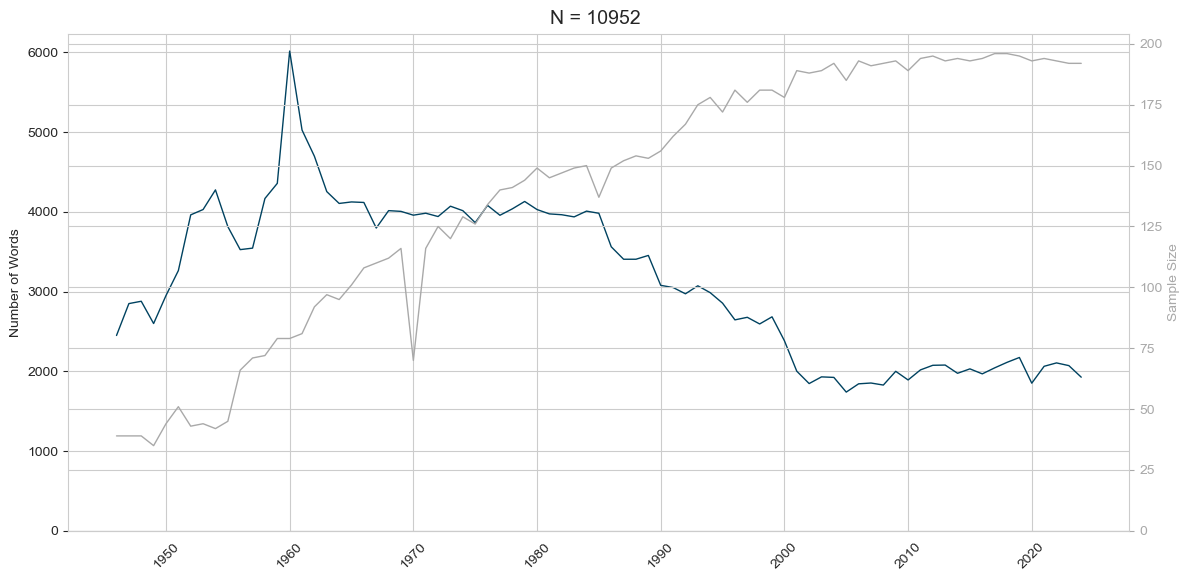

In [107]:
speech_length_words = un_corpus_scored.groupby("year")["speech_length_words"].mean()

# Plot
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: percentage of women
sns.lineplot(
    x=speech_length_words.index,
    y=speech_length_words.values,
    color=CUSTOM_COLORS[0], 
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("Number of Words")
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0)  # left y-axis (number of words)
sns.despine(**DESPINE_SETTINGS)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=overall_sample_size_per_year.index,
    y=overall_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)
plt.suptitle(f"N = {overall_total}", fontsize=14, y=0.96) 

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'speech_length_by_year.png'))
plt.show()

### Figure: Longest and Shortest Speeches by Word Count BEFORE PREPROCESSING

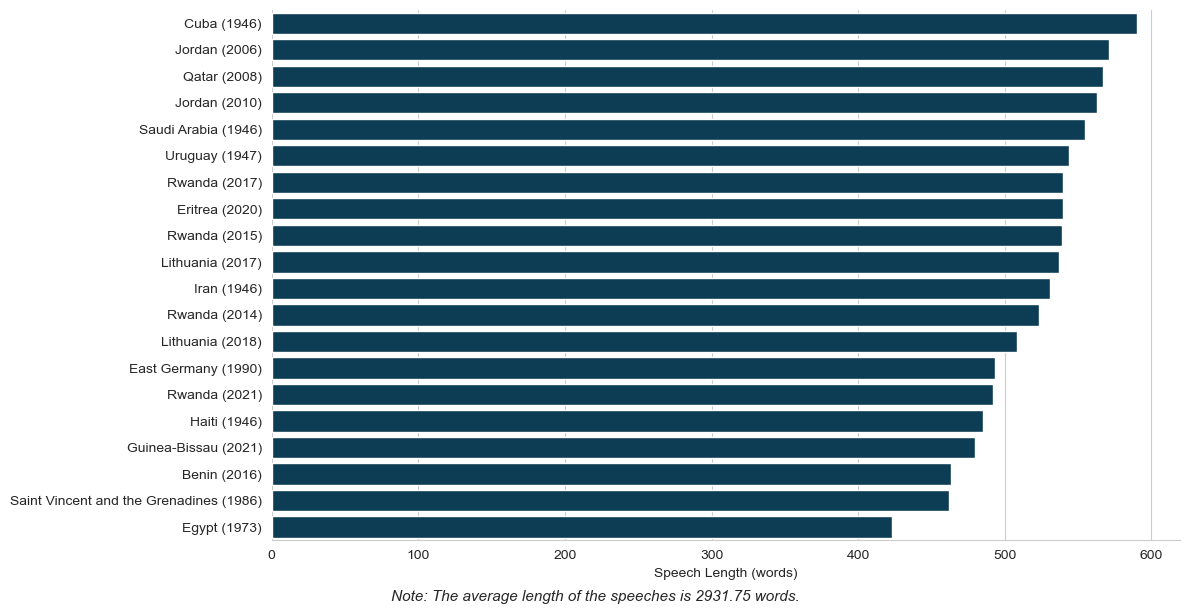

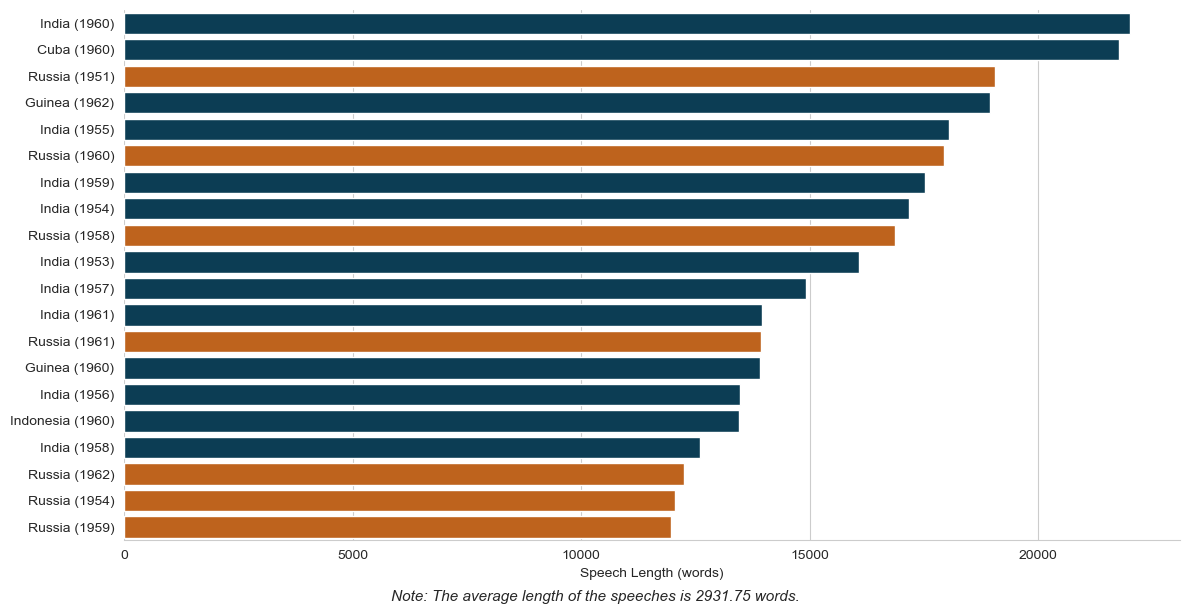

In [64]:
# === Graph 1: 20 Shortest Speeches ===
shortest_speeches = (
    un_corpus_scored.nsmallest(20, 'speech_length_words')
    .sort_values(by='speech_length_words', ascending=False)
    [['speech_label', 'speech_length_words']]
)

plt.figure(figsize=FIGSIZE)
sns.barplot(
    data=shortest_speeches,
    x='speech_length_words',
    y='speech_label',
    color=CUSTOM_COLORS[0]  # consistent blue
)
plt.xlabel("Speech Length (words)")
plt.ylabel("")
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
########################################## MAKE SURE THAT THIS REMAINS CORRECT
plt.figtext(
    0.5, -0.01,
    "Note: The average length of the speeches is 2931.75 words.",
    ha="center",
    fontsize=11,
    style='italic'
)

plt.savefig(os.path.join(fig_dir, '20_shortest_speeches.png'))
plt.show()


# === Graph 2: 20 Longest Speeches ===
longest_speeches = (
    un_corpus_scored.nlargest(20, 'speech_length_words')
    .sort_values(by='speech_length_words', ascending=False)
    [['speech_label', 'speech_length_words', 'country_name', 'security_council_permanent']]
)

# Assign colors: orange if permanent member of security council, blue otherwise
colors_longest_speeches = ['#D95F02' if status == 1 else '#004260' 
          for status in longest_speeches['security_council_permanent']]

plt.figure(figsize=FIGSIZE)
sns.barplot(
    data=longest_speeches,
    x='speech_length_words',
    y='speech_label',
    palette=colors_longest_speeches
)
plt.xlabel("Speech Length (words)")
plt.ylabel("")
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
########################################## MAKE SURE THAT THIS REMAINS CORRECT
plt.figtext(
    0.5, -0.01,
    "Note: The average length of the speeches is 2931.75 words.",
    ha="center",
    fontsize=11,
    style='italic'
)

plt.savefig(os.path.join(fig_dir, '20_longest_speeches.png'))
plt.show()


### Figure: Percentage of Speeches from Countries with English as Official Language

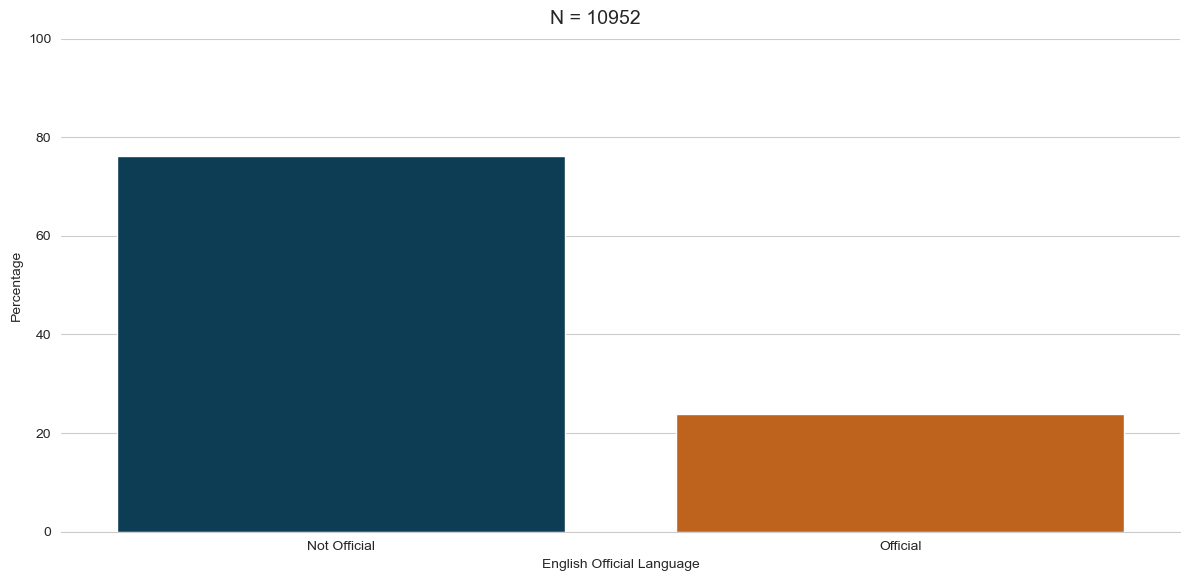

In [27]:
# Count and normalize to get percentages
official_language_percent = un_corpus_scored['english_official_language'].value_counts(normalize=True).sort_index() * 100

official_language_sample_size_per_year = un_corpus_scored.groupby('year')['english_official_language'].count()

official_language_total = official_language_sample_size_per_year.sum()

# Define labels
eng_labels = ['Not Official', 'Official']

# Plot
plt.figure(figsize=FIGSIZE)
sns.barplot(
    x=eng_labels,
    y=official_language_percent.values,
    palette=[CUSTOM_COLORS[0], CUSTOM_COLORS[4]] # Assign colors: orange if english official language, blue otherwise
)

plt.ylabel("Percentage")
plt.xlabel("English Official Language")
plt.ylim(0, 100)  # force axis max at 100%
plt.suptitle(f"N = {official_language_total}", fontsize=14, y=0.96)
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

plt.savefig(os.path.join(fig_dir, 'english_official_language_percentage.png'))
plt.show()

### Figure: Share of female speakers

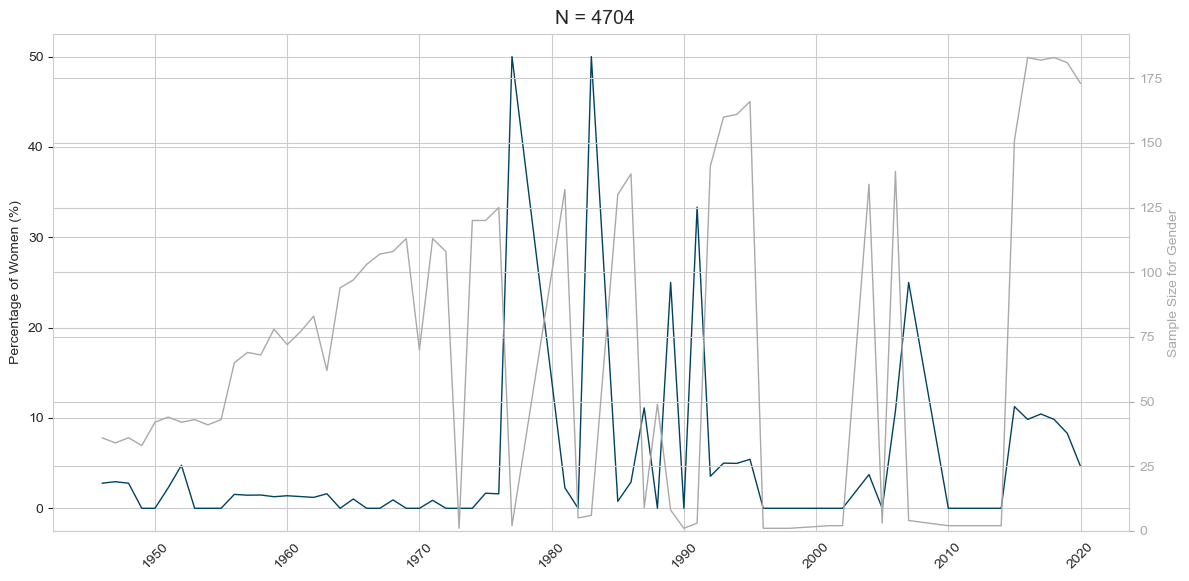

In [109]:
# Filter to only 0 and 1 (exclude NaNs)
df_gender = un_corpus_scored[un_corpus_scored['gender_dummy'].isin([0, 1])]

# Percentage share of women per year
female_percent = df_gender.groupby('year')['gender_dummy'].mean() * 100

# Sample size per year
gender_sample_size_per_year = df_gender.groupby('year')['gender_dummy'].count() 

# Total sample size included in the plot
gender_total = gender_sample_size_per_year.sum()

# Plot
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: percentage of women
sns.lineplot(
    x=female_percent.index,
    y=female_percent.values,
    color=CUSTOM_COLORS[0], 
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("Percentage of Women (%)")
ax1.tick_params(axis='y')
sns.despine(**DESPINE_SETTINGS)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=gender_sample_size_per_year.index,
    y=gender_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size for Gender", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)
plt.suptitle(f"N = {gender_total}", fontsize=14, y=0.96) 

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'female_speakers_percentage_by_year.png'))
plt.show()


### Figure: Share of position by speakers

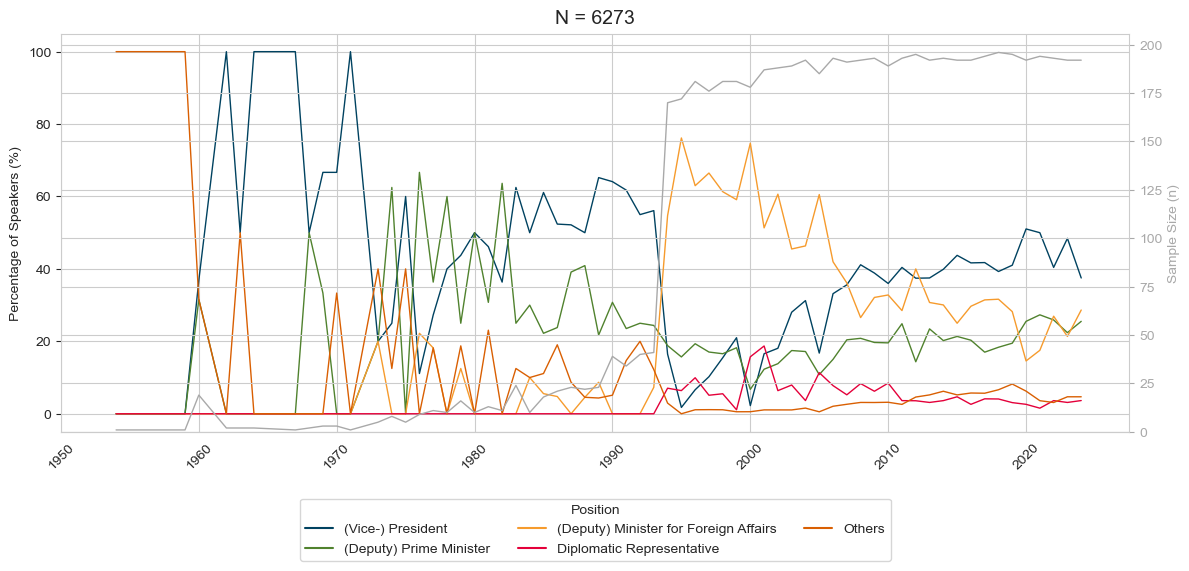

In [111]:
# === Preprocess ===
# Head of State, Monarch and Head of Government are additional categories which were created in 0_data_creation. However plotting
# too many categories would be confusing, therefore they were merged to others
merge_to_others = ["Head of State", "Monarch", "Head of Government"]
un_corpus_scored["position"] = un_corpus_scored["position"].replace(merge_to_others, "Others")

# Counts per year and position
position_counts = (
    un_corpus_scored.groupby(['year', 'position'])
    .size()
    .unstack(fill_value=0)  # rows = years, columns = positions
    .sort_index()
)

position_sample_size_per_year = position_counts.sum(axis=1)

# Total sample size (entire dataset for these positions)
position_total = position_sample_size_per_year.sum()

# Percentages per year per position
position_percentage = position_counts.div(position_counts.sum(axis=1), axis=0) * 100

# Focus on selected top positions
top_positions = [
    '(Vice-) President', 
    '(Deputy) Prime Minister', 
    '(Deputy) Minister for Foreign Affairs', 
    'Diplomatic Representative', 
    'Others'
]
position_percentage = position_percentage[top_positions].fillna(0)

# Long format
position_percentage_long = (
    position_percentage
    .reset_index()
    .melt(id_vars="year", var_name="position", value_name="percentage")
)

# === Plot ===

fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Percentages by position
sns.lineplot(
    data=position_percentage_long,
    x="year",
    y="percentage",
    hue="position",
    palette=CUSTOM_COLORS,
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_ylabel("Percentage of Speakers (%)")
ax1.set_xlabel("")
ax1.tick_params(axis="y")
sns.despine(**DESPINE_SETTINGS)

# Sample size (secondary axis)
ax2 = ax1.twinx()
sns.lineplot(
    x=position_sample_size_per_year.index,
    y=position_sample_size_per_year.values,
    color="darkgrey",
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size (n)", color="darkgrey")
ax2.tick_params(axis="y", colors="darkgrey")
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Legend
ax1.legend(
    title="Position",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

plt.suptitle(f"N = {position_total}", fontsize=14, y=0.96)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

plt.savefig(os.path.join(fig_dir, 'speaker_positions_by_year.png'))
plt.show()


### Figure: Emotionality Scoring overall

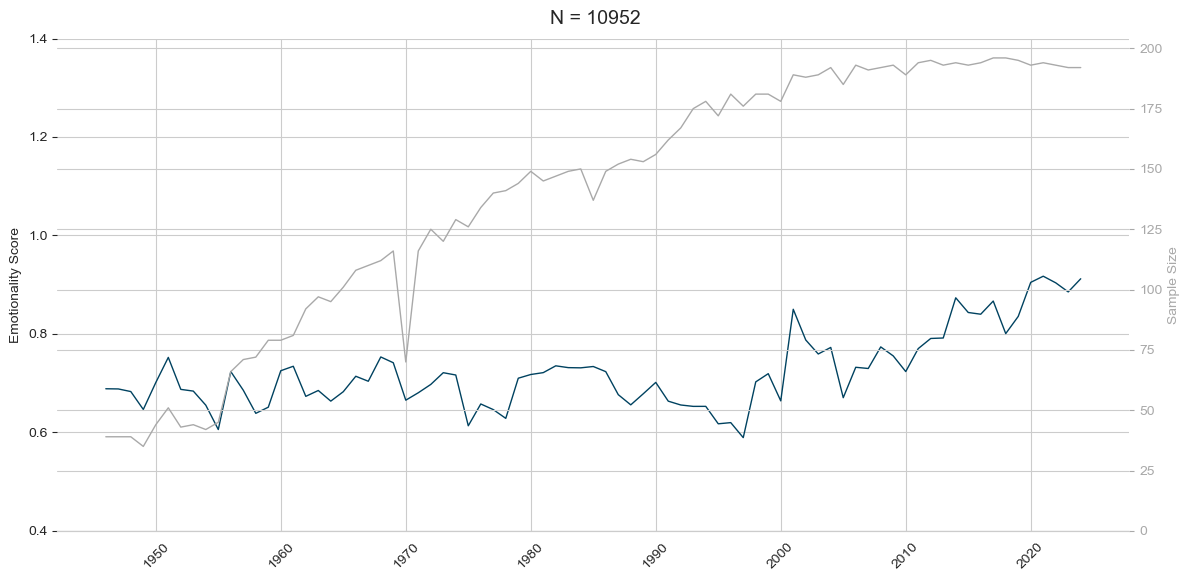

In [113]:
# Mean score per year
score_over_time = un_corpus_scored.groupby('year')['score'].mean()

# Plot
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: Emotionality score
sns.lineplot(
    x=score_over_time.index,
    y=score_over_time.values,
    marker=MARKER,
    color=CUSTOM_COLORS[0],
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=overall_sample_size_per_year.index,
    y=overall_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)


sns.despine(**DESPINE_SETTINGS)

plt.suptitle(f"N = {overall_total}", fontsize=14, y=0.96)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time.png'))
plt.show()


In [37]:
score_table = (
    un_corpus_scored
    .groupby('year')['score']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean':'avg_score', 'count':'n'})
)

# Round for readability
score_table['avg_score'] = score_table['avg_score'].round(3)

# Ensure all rows are displayed
with pd.option_context('display.max_rows', None):
    display(score_table)


,year,avg_score,n
0,1946,0.689,39
1,1947,0.688,39
2,1948,0.683,39
3,1949,0.647,35
4,1950,0.701,44
5,1951,0.752,51
6,1952,0.687,43
7,1953,0.684,44
8,1954,0.655,42
9,1955,0.606,45


### Figure: Emotionality by permanent Security Council Membership

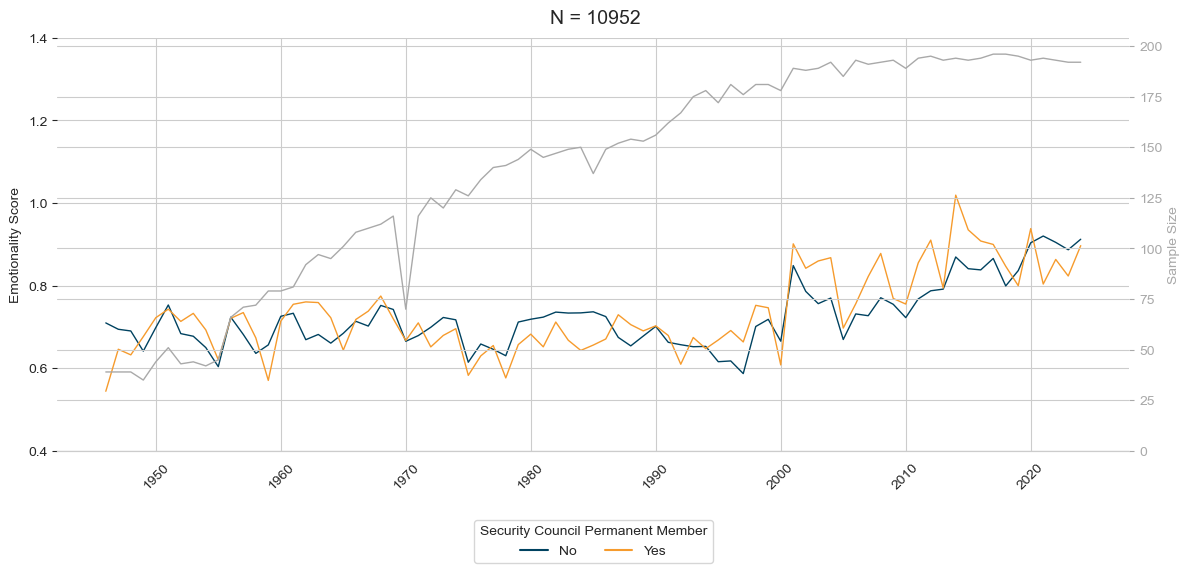

In [115]:
# Total sample size 
security_council_total = un_corpus_scored['security_council_permanent'].notna().sum()

# Sample size per year (non-missing scores)
security_council_sample_size_per_year = un_corpus_scored.groupby('year')['security_council_permanent'].count()

# Mean scores by year and security council membership
score_over_time_security_council = (
    un_corpus_scored
    .groupby(['year', 'security_council_permanent'])['score']
    .mean()
    .reset_index()
)

score_over_time_security_council['security_council_permanent_label'] = score_over_time_security_council['security_council_permanent'].map({0: 'No', 1: 'Yes'})

# === Plot ===
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: Emotionality score by SC membership
sns.lineplot(
    data=score_over_time_security_council,
    x='year',
    y='score',
    hue='security_council_permanent_label',
    palette={'No': CUSTOM_COLORS[0], 'Yes': CUSTOM_COLORS[2]},
    linewidth=LINEWIDTH,
    marker=MARKER,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=security_council_sample_size_per_year.index,
    y=security_council_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

ax1.legend(
    title="Security Council Permanent Member",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

plt.suptitle(f"N = {security_council_total}", fontsize=14, y=0.96)
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_security_council_membership.png'))
plt.show()


### Figure: Emotionality Scoring by permanent Security Council Members

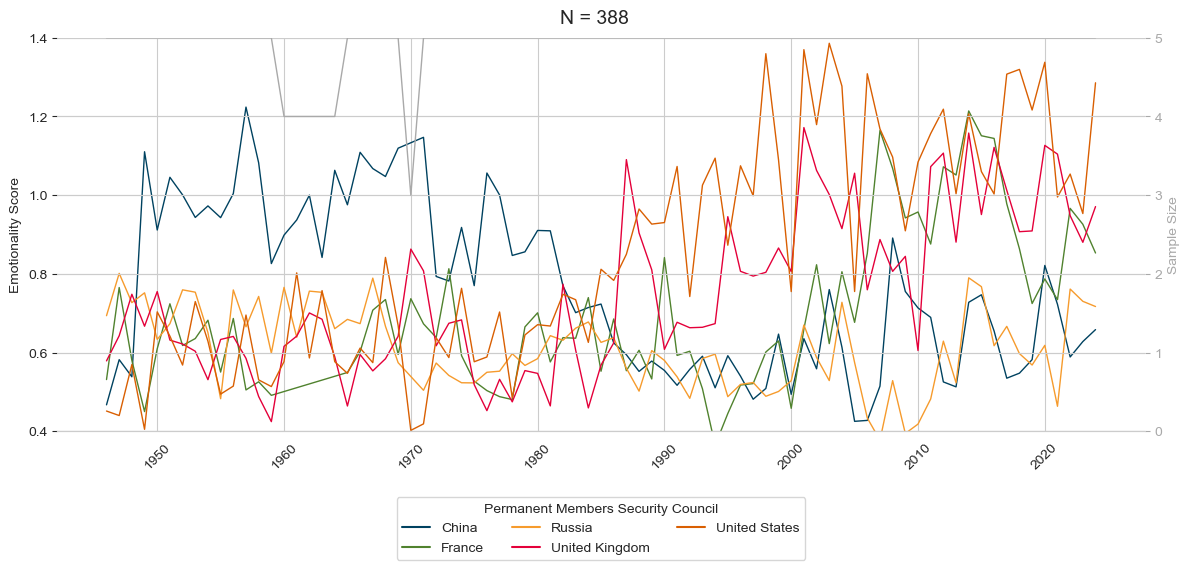

In [117]:
# Filter only Security Council permanent members
permanent_members = un_corpus_scored[un_corpus_scored['security_council_permanent'] == 1]

# Total sample size
permanent_members_total = permanent_members[['score', 'country_name']].dropna().shape[0]

# Sample size per year
permanent_members_sample_size_per_year = permanent_members.groupby('year')['security_council_permanent'].count()

# Mean scores by year and country_name
score_over_time_permanent_members = (
    permanent_members
    .groupby(['year', 'country_name'])['score']
    .mean()
    .reset_index()
)

# === Plot ===
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: Emotionality score by country_name
sns.lineplot(
    data=score_over_time_permanent_members,
    x='year',
    y='score',
    hue='country_name',
    palette=CUSTOM_COLORS,
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_ylabel("Emotionality Score")
ax1.set_xlabel("")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=permanent_members_sample_size_per_year.index,
    y=permanent_members_sample_size_per_year.values,
    color='darkgrey',
    linewidth=1,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.set_ylim(0, 5)
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Legend
ax1.legend(
    title="Permanent Members Security Council",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

sns.despine(**DESPINE_SETTINGS)

plt.suptitle(f"N = {permanent_members_total}", fontsize=14, y=0.96)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_permanent_members.png'))
plt.show()


### Figure: Emotionality Scoring by Gender

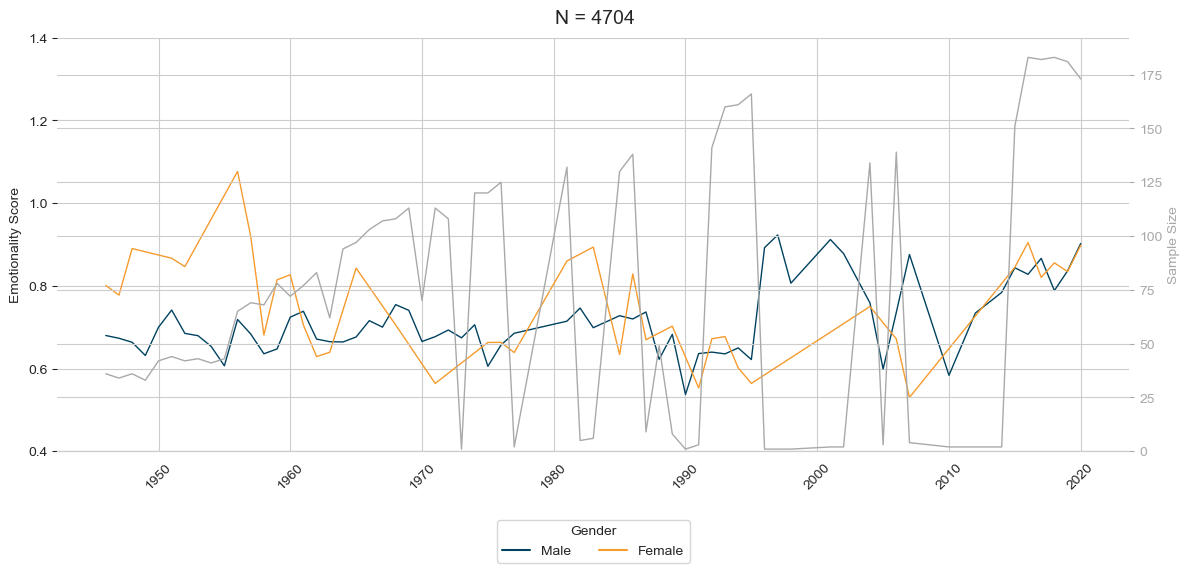

In [125]:
# Mean scores by year and gender
score_over_time_gender = (
    un_corpus_scored
    .groupby(['year', 'gender_dummy'])['score']
    .mean()
    .reset_index()
)

score_over_time_gender['gender_label'] = score_over_time_gender['gender_dummy'].map({0: 'Male', 1: 'Female'})

# === Plot ===
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: Emotionality score by gender
sns.lineplot(
    data=score_over_time_gender,
    x='year',
    y='score',
    hue='gender_label',
    palette={'Male': CUSTOM_COLORS[0], 'Female': CUSTOM_COLORS[2]},
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=gender_sample_size_per_year.index,
    y=gender_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

ax1.legend(
    title="Gender",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

sns.despine(**DESPINE_SETTINGS)
plt.suptitle(f"N = {gender_total}", fontsize=14, y=0.96)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_gender.png'))
plt.show()


### Figure: Emotionality Scoring by english as official language

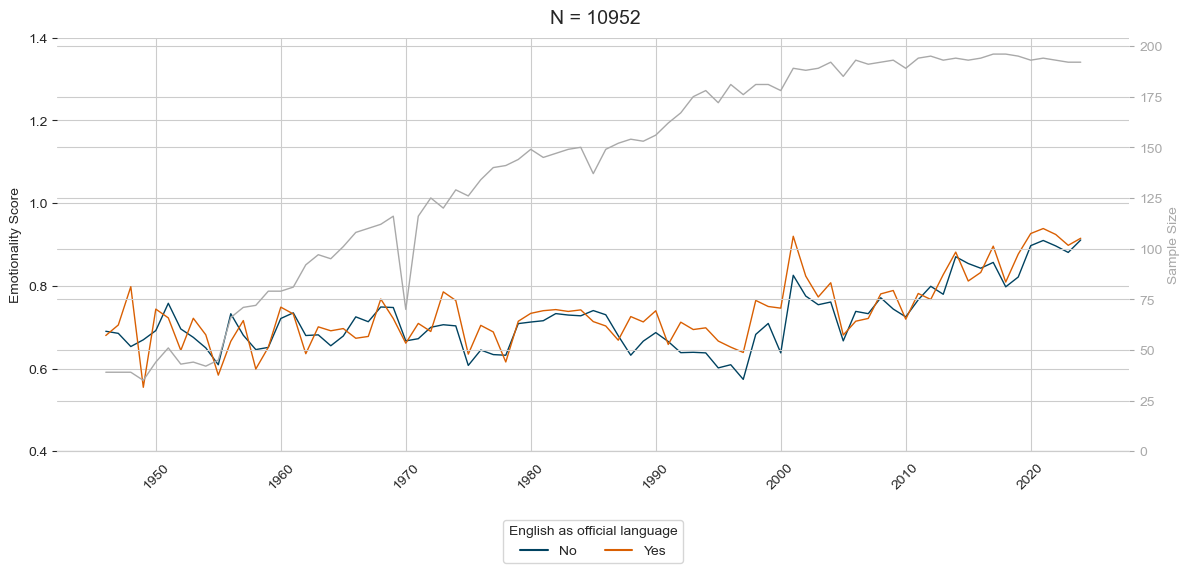

In [121]:
# Mean scores by year and English official language
score_over_time_official_language = (
    un_corpus_scored
    .groupby(['year', 'english_official_language'])['score']
    .mean()
    .reset_index()
)
score_over_time_official_language['english_label'] = score_over_time_official_language['english_official_language'].map({0: 'No', 1: 'Yes'})

# === Plot ===
fig, ax1 = plt.subplots(figsize=(12,6))

# Left y-axis: Emotionality score by English official language
sns.lineplot(
    data=score_over_time_official_language,
    x='year',
    y='score',
    hue='english_label',
    palette={'No': '#004260', 'Yes': '#D95F02'},
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=official_language_sample_size_per_year.index,
    y=official_language_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Legend
ax1.legend(
    title="English as official language",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

plt.suptitle(f"N = {official_language_total}", fontsize=14, y=0.96)
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_english_official_language.png'))
plt.show()


### Figure: Emotionality Scoring by Speaker Position

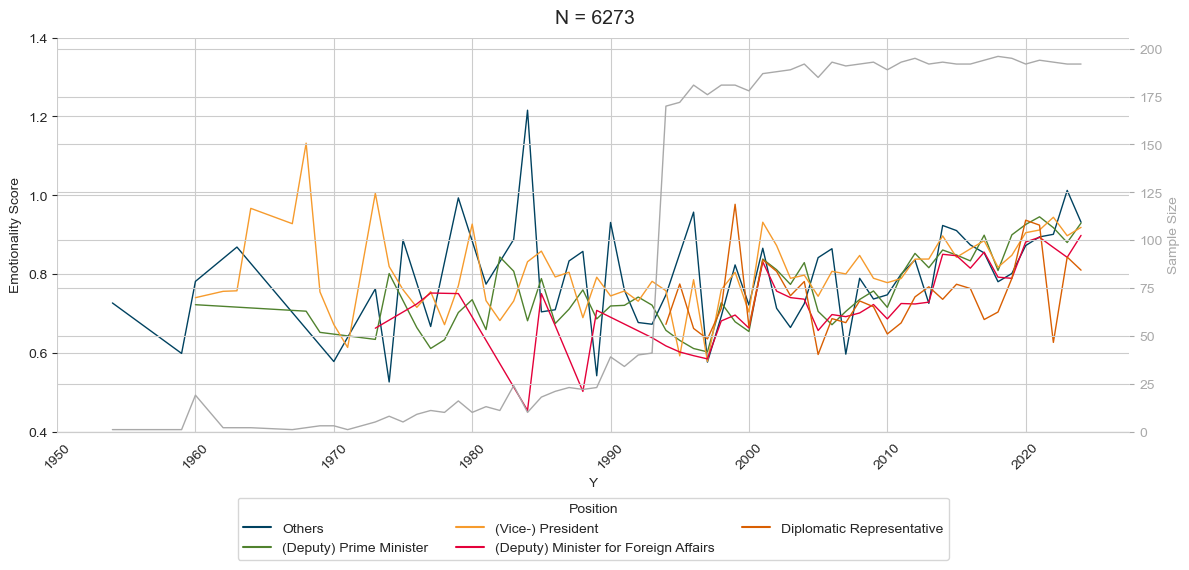

In [123]:
# Mean emotionality score by year and position
score_over_time_position = (
    un_corpus_scored
    .groupby(['year', 'position'])['score']
    .mean()
    .reset_index()
)

# Drop "Others" if not needed
#score_over_time_position = score_over_time_position[score_over_time_position['position'] != "Others"]

# Ensure position is string
score_over_time_position['position'] = score_over_time_position['position'].astype(str)

# === Plot ===
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: emotionality scores by position
sns.lineplot(
    data=score_over_time_position,
    x='year',
    y='score',
    hue='position',
    palette=CUSTOM_COLORS,  # your predefined palette
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_xlabel("Y")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size
ax2 = ax1.twinx()
sns.lineplot(
    x=position_sample_size_per_year.index,
    y=position_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Legend
ax1.legend(
    title="Position",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

plt.suptitle(f"N = {position_total}", fontsize=14, y=0.96)
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_position.png'))
plt.show()

In [49]:
# Count speeches per year and position
counts_per_year = (
    un_corpus_scored
    .groupby(['year', 'position'])
    .size()
    .reset_index(name='count')
)

# Drop "Others"
#counts_per_year = counts_per_year[counts_per_year['position'] != "Others"]

# Pivot into a wide table for readability
counts_pivot = (
    counts_per_year
    .pivot(index='year', columns='position', values='count')
    .fillna(0)
    .astype(int)
)

# Display nicely
from IPython.display import display
display(counts_pivot)



position,(Deputy) Minister for Foreign Affairs,(Deputy) Prime Minister,(Vice-) President,Diplomatic Representative,Others
year,,,,,
1954,0,0,0,0,1
1959,0,0,0,0,1
1960,0,6,7,0,6
1962,0,0,2,0,0
1963,0,0,1,0,1
...,...,...,...,...,...
2020,28,49,98,5,12
2021,34,53,97,3,7
2022,52,50,78,7,6


### Wordcloud with the most common words

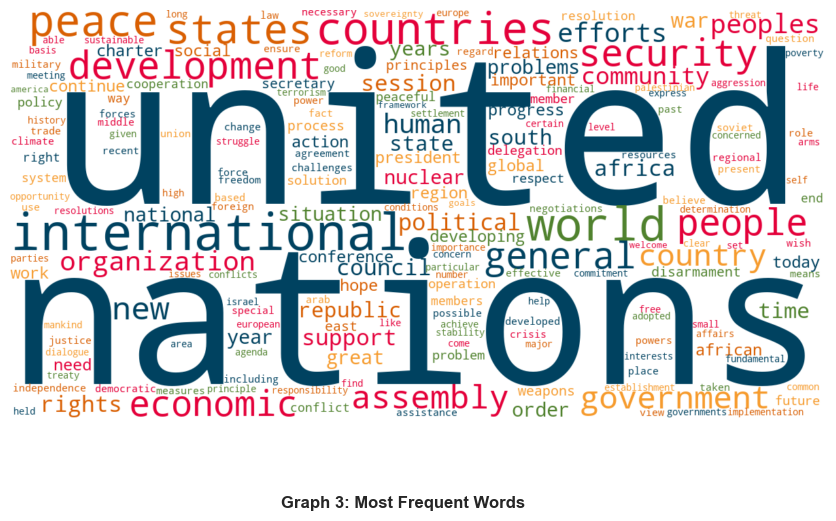

In [155]:
# == Graph 4: Most Frequent Words ==

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap=custom_cmap,
    max_words=200,
    contour_color='steelblue',
    contour_width=2,
    prefer_horizontal=1.0,
    margin=0
).generate_from_frequencies(word_counts_wordcloud)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplots_adjust(bottom=0.20)  # Create space at bottom
plt.figtext(0.5, 0.05, "Graph 3: Most Frequent Words", ha='center', fontsize=12, weight='bold')

plt.savefig(os.path.join(fig_dir, 'most_frequent_words.png'), bbox_inches='tight', pad_inches=0)
plt.show()


In [206]:
affect_out_path = os.path.join(data_freq, "affect_words.txt")
cog_out_path = os.path.join(data_freq, "cog_words.txt")

def load_words(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    tokens = content.strip().split()
    words = tokens[::2]
    counts = tokens[1::2]
    counts = [int(c.strip('(),')) for c in counts]
    df = pd.DataFrame({'word': words, 'count': counts})
    return df

# Load top 10 words from each dictionary
affect_df = load_words(affect_out_path).nlargest(10, 'count').reset_index(drop=True)
cog_df = load_words(cog_out_path).nlargest(10, 'count').reset_index(drop=True)

# Pad the smaller dataframe if needed (in case counts differ)
max_len = max(len(affect_df), len(cog_df))
affect_df = affect_df.reindex(range(max_len))
cog_df = cog_df.reindex(range(max_len))

# Combine into one dataframe with 4 columns
combined_df = pd.DataFrame({
    'Affect Dictionary': affect_df['word'],
    'Frequency ': affect_df['count'],
    'Cognition Dictionary': cog_df['word'],
    'Frequency': cog_df['count']
})

fig_plot, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=combined_df.fillna('').values,
                 colLabels=combined_df.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Add caption below the table
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.get_text().set_weight('bold')
plt.subplots_adjust(bottom=0.2)  # make space at the bottom
fig_plot.text(0.5, 0.05, 'Table 1: Highest frequencies from affection and cognition dictionaries', 
         ha='center', fontsize=14, weight='bold')

plt.tight_layout(rect=[0, 0.1, 1, 1])  # leave bottom margin for caption
plt.savefig(os.path.join(fig_dir, 'top10_affect_cognition_combined.png'))

plt.close()
